In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# np-chart

https://support.minitab.com/en-us/minitab/19/help-and-how-to/quality-and-process-improvement/control-charts/how-to/attributes-charts/np-chart/methods-and-formulas/methods-and-formulas/ (last accessed: 27.4.2020)

Number of defectives for subgroup $i$: $x_{i}$

Number of values in subgroup $i$: $n_{i}$

Process proportion: $p$

Central line: $\mu = \bar{p} = \dfrac{\Sigma x_{i}}{\Sigma n_{i}}$ (if not specified)

Location of the center line for each subgroup $i$: $CL = n_{i}p$

Standard deviation: $\sigma = \sqrt{n_{i}p(1-p)}$

Upper control line: $UCL_{np} = n_{i}p + 3\cdot\sqrt{n_{i}p(1-p)}$

Lower control line: $LCL_{np} = n_{i}p - 3\cdot\sqrt{n_{i}p(1-p)}$ or $LCL_{np} = 0$

Plotted statistics: $x_{i}$

Description:

The np chart is an attribute control chart used to study the number of nonconforming or defective items. Often, information about the types of nonconformities is collected on the same chart to help determine the causes of variation.

In [9]:
def read_data(path):
    return pd.read_csv(path)

# Read the data
path = r'data\npchart_data.csv'
npdata = read_data(path)
npdata.head()

,Observation,Sample size,Defective samples
0,1,70,1
1,2,50,0
2,3,50,3
3,4,50,2
4,5,50,4


In [10]:
# Clean data
del npdata['Observation']
npdata.head()

,Sample size,Defective samples
0,70,1
1,50,0
2,50,3
3,50,2
4,50,4


In [11]:
def compute_parameters(num_defectives, num_samples, p=None):
    # Compute the center line p_bar
    if p is None:
        p = num_defectives.sum() / num_samples.sum()
    
    # Central line for each subgroup
    CL = num_samples * p
    CL_mean = CL.mean()
    
    # Compute the upper and lower control limit
    ucl = num_samples*p + 3*np.sqrt(num_samples*p*(1-p))
    ucl_mean = ucl.mean()
    
    lcl = num_samples*p - 3*np.sqrt(num_samples*p*(1-p))
    lcl = np.maximum(lcl, 0)
    lcl_mean = lcl.mean()
    
    return CL, ucl, lcl, ucl_mean, lcl_mean, CL_mean
    
CL, ucl, lcl, ucl_mean, lcl_mean, CL_mean = compute_parameters(npdata['Defective samples'], npdata['Sample size'], p=0.04)
CLbar, uclbar, lclbar, uclbar_mean, lclbar_mean, CLbar_mean = compute_parameters(npdata['Defective samples'], npdata['Sample size'])

#print(f'Central line for each subgroup, CL: {CL:.4f}')
print(f'CL: {CL_mean}')
print(f'Lower control limit:\n{lcl}')
print(f'Upper control limit:\n{ucl}')
print('\n\n')
#print(f'Central line for each subgroup, CLbar: {CLbar:.4f}')
print(f'CLbar: {CLbar_mean}')
print(f'Lower control limit:\n{lclbar}')
print(f'Upper control limit:\n{uclbar}')

CL: 2.0833333333333335
Lower control limit:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: Sample size, dtype: float64
Upper control limit:
0     7.718536
1     6.156922
2     6.156922
3     6.156922
4     6.156922
5     6.156922
6     6.156922
7     6.156922
8     6.156922
9     7.718536
10    6.156922
11    6.156922
12    6.156922
13    6.156922
14    6.156922
15    6.953680
16    6.156922
17    6.156922
18    6.156922
19    6.156922
20    6.156922
21    6.156922
22    6.156922
23    6.156922
Name: Sample size, dtype: float64



CLbar: 2.5833333333333335
Lower control limit:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0

In [12]:
# Plot the np-chart
def plot_npchart(x_axis, y_axis, mu, ucl, lcl, ucl_mean, lcl_mean, title, x_label, y_label):
    fig, ax = plt.subplots()

    ax.plot(x_axis, y_axis, 'o-', c='red')

    mu_line = mu*np.ones(x_axis.size)
    ax.plot(mu_line, c='yellow', label=f'Central line={mu.mean():.4f}')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl_mean:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl_mean:.4f}')

    ax.set_xticks(np.arange(x_axis.size))
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title(title, fontsize=25)
    
    ax.set_xlabel(x_label, fontsize=15)
    
    ax.set_ylabel(y_label, fontsize=15)

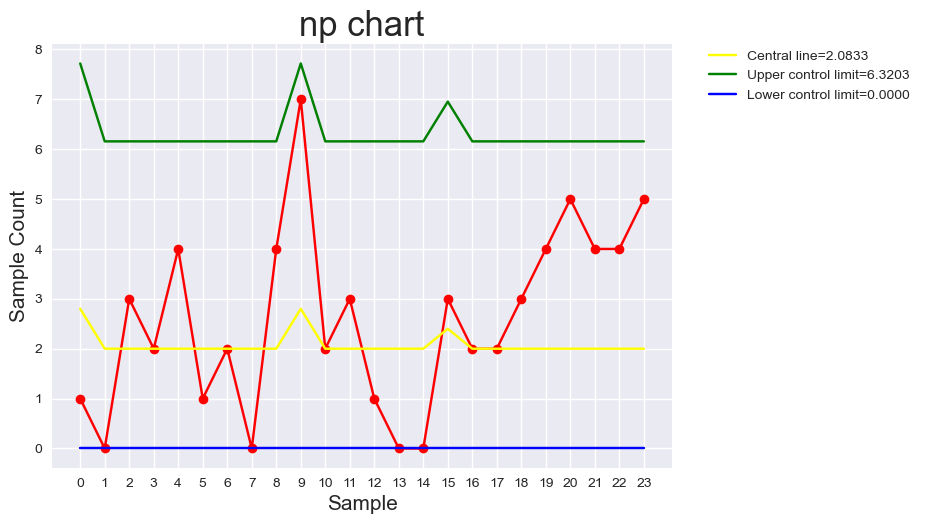

In [13]:
# With predefined p-value
plot_npchart(x_axis=npdata.index, y_axis=npdata['Defective samples'], mu=CL, ucl=ucl, lcl=lcl, ucl_mean=ucl_mean, lcl_mean=lcl_mean, title=r'np chart', x_label=r'Sample', y_label='Sample Count')

np control chart generated in Minitab 17 for comparison:

<img src="minitab\npchart_predefined.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There are no points beyond the control limits, and there is no unwanted pattern. The process is in statistical control.

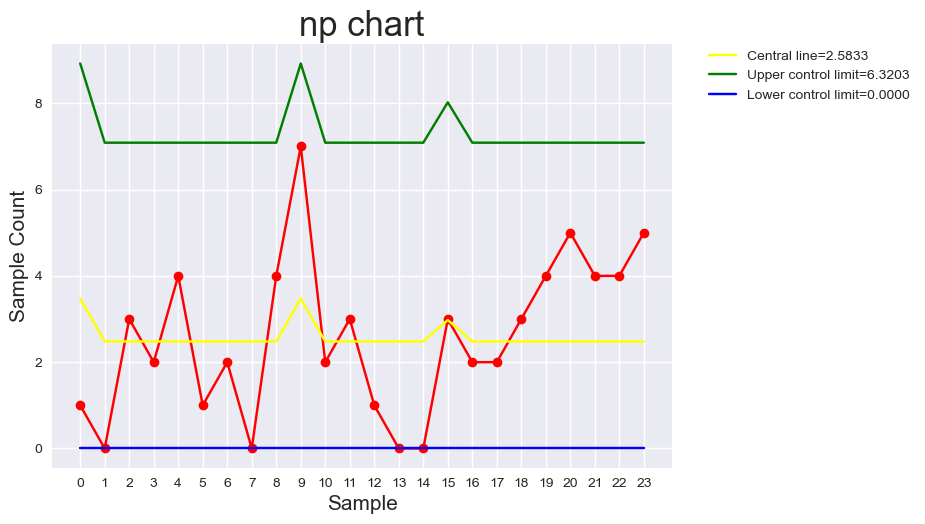

In [14]:
# Without predefined p-value
plot_npchart(x_axis=npdata.index, y_axis=npdata['Defective samples'], mu=CLbar, ucl=uclbar, lcl=lclbar, ucl_mean=ucl_mean, lcl_mean=lcl_mean, title=r'np chart', x_label=r'Sample', y_label='Sample Count')

np control chart generated in Minitab 17 for comparison:

<img src="minitab\npchart.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There are no points beyond the control limits, and there is no unwanted pattern. The process is in statistical control.